(sec:cnn)=
# Convolutional Neural Networks (CNN)

## CNNs _à la_ LeNet

## Anatomy of a ResNet

## Using a pre-trained model for better performance

## ConvNets for time series

Convolutional neural networks for time series rely on the
1d convolution operator that, given a time series $\mathbf{x}$ and a filter
$\mathbf{f}$, computes an activation map as:

\begin{equation}
    \left(\mathbf{x} * \mathbf{f}\right)(t) = \sum_{k=1}^L f_{k} x_{t + k}
\end{equation}

where $L$ is the length (number of timestamps) of the filter $\mathbf{f}$.

The following code illustrates this notion using a Gaussian filter:

In [1]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import matplotlib.pyplot as plt

plt.ion();

Matplotlib is building the font cache; this may take a moment.


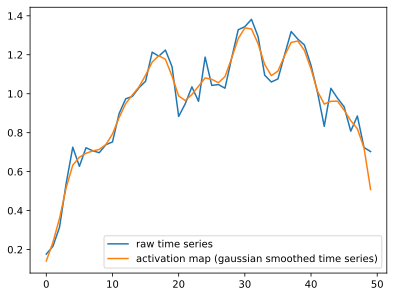

In [2]:
import numpy as np

def random_walk(size):
    rnd = np.random.randn(size) * .1
    ts = rnd
    for t in range(1, size):
        ts[t] += ts[t - 1]
    return ts

np.random.seed(0)
x = random_walk(size=50)
f = np.exp(- np.linspace(-2, 2, num=5) ** 2 / 2)
f /= f.sum()

plt.figure()
plt.plot(x, label='raw time series')
plt.plot(np.correlate(x, f, mode='same'),
         label='activation map (gaussian smoothed time series)')
plt.legend();

Convolutional neural networks are made of convolution blocks whose parameters
are the coefficients of the filters they embed (hence filters are not fixed
    _a priori_ as in the example above but rather learned).
These convolution blocks are translation equivariant, which means that a
(temporal) shift in their input results in the same temporal shift in the
output:

In [3]:
from IPython.display import HTML
from celluloid import Camera

f = np.zeros((12, ))
f[:4] = -1.
f[4:8] = 1.
f[8:] = -1.

length = 60

fig = plt.figure()
camera = Camera(fig)

for pos in list(range(5, 35)) + list(range(35, 5, -1)):
    x = np.zeros((100, ))
    x[pos:pos+length] = np.sin(np.linspace(0, 2 * np.pi, num=length))

    act = np.correlate(x, f, mode='same')

    plt.subplot(2, 1, 1)
    plt.plot(x, 'b-')
    plt.title("Input time series")
    fig2 = plt.subplot(2, 1, 2)
    plt.plot(act, 'r-')
    plt.title("Activation map")

    axes2 = fig.add_axes([.15, .35, 0.2, 0.1]) # renvoie un objet Axes
    axes2.plot(f, 'k-')
    axes2.set_xticks([])
    axes2.set_title("Filter")

    plt.tight_layout()
    camera.snap()

anim = camera.animate()
plt.close()

HTML(anim.to_jshtml())

/tmp/ipykernel_5658/368849627.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_5658/368849627.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig2 = plt.subplot(2, 1, 2)


As we have seen earlier, convolutional models are known to perform very well in computer vision
applications, using moderate amounts of parameters compared to fully connected
ones (of course, counter-examples exist, and the term "moderate" is
especially vague).

Most standard time series architectures that rely on convolutional blocks
are straight-forward adaptations of
models from the computer vision community
({cite:p}`leguennec:halshs-01357973` relies on an
old-fashioned alternance between convolution and pooling layers,
while more recent works rely on residual connections and
inception modules {cite:p}`fawaz2020inceptiontime`).

These models (and more) are presented and benchmarked in
{cite:p}`fawaz2019deep` that we
advise the interested reader to refer to for more details.


## References

```{bibliography}
:filter: docname in docnames
```